In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = "2012-01-01"
end = "2024-10-30"

stock = 'GOOG' # google Stock

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
#data
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
3222,2024-10-23,166.429993,167.600006,163.632996,164.479996,164.479996,12754300
3223,2024-10-24,164.589996,165.050003,162.770004,164.529999,164.529999,12764400
3224,2024-10-25,165.365005,167.399994,165.229996,166.990005,166.990005,14566400
3225,2024-10-28,170.589996,170.606003,165.789993,168.339996,168.339996,20858300


In [5]:
mv_100_days = data.Close.rolling(100).mean()

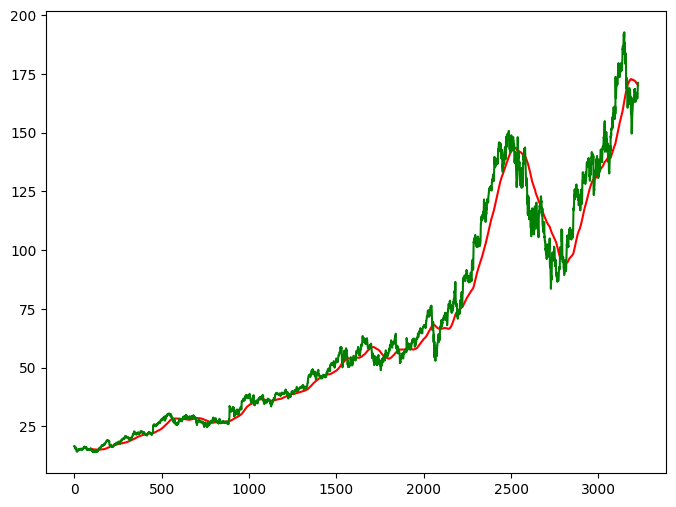

In [6]:
plt.figure(figsize=(8,6))
plt.plot(mv_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [7]:
mv_200_days = data.Close.rolling(200).mean()

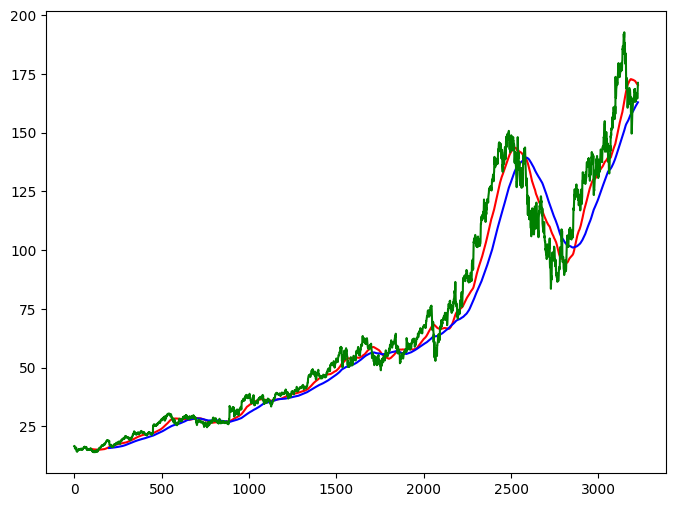

In [8]:
plt.figure(figsize=(8,6))
plt.plot(mv_100_days,'r')
plt.plot(mv_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True) # remove NULL/Missing values

In [10]:
# 80%->train 20%->test
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape[0], data_test.shape[0]

(2581, 646)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [15]:
x,y = np.array(x), np.array(y)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True,))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\patel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x, y, epochs = 250, batch_size = 32, verbose = 1)

Epoch 1/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0018
Epoch 2/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0018
Epoch 3/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.0019
Epoch 4/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0020
Epoch 5/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0021
Epoch 6/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - loss: 0.0018
Epoch 7/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0017
Epoch 8/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0017
Epoch 9/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0017
Epoch 10/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.0023
Epoch 11/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0020
Epoch 12/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - loss: 0.0020
Epoch 13/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0019
Epoch 14/250
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0018
Epoch 15/250
78/78 ━━━━━━━━━━━━━

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index= True)

In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

x , y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [27]:
scale = 1/scaler.scale_

In [28]:
y_predict = y_predict * scale

In [29]:
y = y * scale

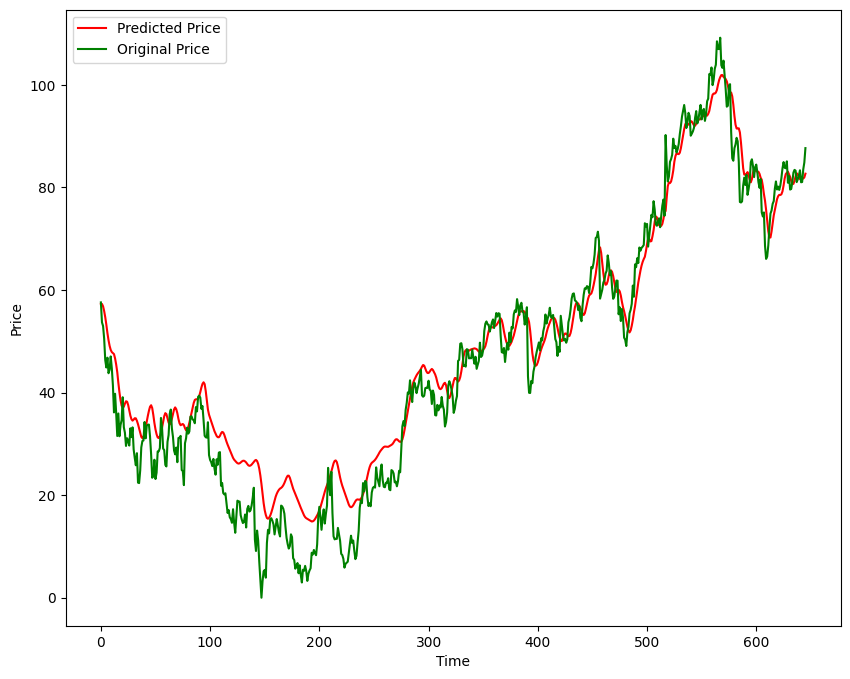

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label = 'Predicted Price')
plt.plot(y,'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Prediction Model.keras')